# r book

In [60]:
df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [61]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"July 10, 2022","July 10, 2022",Run,429,3.09815,2301,12.3732,0.993196,4.8492,60.411,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939


In [62]:
summary(df)

 Date.Submitted     Workout.Date       Activity.Type     
 Length:696         Length:696         Length:696        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories.Burned..kCal. Distance..mi.    Workout.Time..seconds.
 Min.   :   0.0         Min.   : 0.000   Min.   :    0         
 1st Qu.: 228.0         1st Qu.: 1.991   1st Qu.: 1451         
 Median : 403.0         Median : 3.100   Median : 1800         
 Mean   : 398.7         Mean   : 3.081   Mean   : 2407         
 3rd Qu.: 452.2         3rd Qu.: 3.513   3rd Qu.: 2330         
 Max.   :2473.0         Max.   :13.482   Max.   :80568         
                                                               
 Avg.Pace..min.mi. Max.P

In [63]:
library(lubridate)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [64]:
df <- data.frame(df)

In [65]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"July 10, 2022","July 10, 2022",Run,429,3.09815,2301,12.3732,0.993196,4.8492,60.411,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939


In [66]:
df['duration'] <- df['Workout.Time..seconds.'] / 60

In [67]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 10, 2022","July 10, 2022",Run,429,3.09815,2301,12.3732,0.993196,4.8492,60.411,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939,38.35


In [68]:
#determine your working library
getwd()

[1] "c:/Users/coleb/OneDrive/Coraline/MapMyRunProjects"

In [69]:
#download your file
#download.file("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", "user94403143_workout_history.csv")

In [70]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [71]:
head(run_data, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 10, 2022","July 10, 2022",Run,429,3.09815,2301,12.3732,0.993196,4.8492,60.411,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939,38.35


In [72]:
#convert the datetime variables using the following logic:
#%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
run_data$Workout.Date <- as.Date(run_data$Workout.Date, format = "%B %e, %Y")
run_data$Date.Submitted <- as.Date(run_data$Date.Submitted, format = "%B %e, %Y")

In [73]:
#install.packages("lubridate")

In [74]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Notes,Source,Link,duration
,<date>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,2022-07-10,2022-07-10,Run,429,3.09815,2301,12.3732,0.993196,4.84920,60.4110,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939,38.35000
2,2022-07-09,2022-07-09,Run,430,3.10009,2005,10.7738,1.166080,5.56904,51.4543,157,5261,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6701305771,33.41667


In [75]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [76]:
#df$minutes <- as.integer(df$minutes)
#Having issues converting doubles to int so I can round them to 2 decimal places

In [77]:
head(df, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<date>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,2022-07-10,2022-07-10,Run,429,3.09815,2301,12.3732,0.993196,4.84920,60.4110,149,5125,38.35000
2,2022-07-09,2022-07-09,Run,430,3.10009,2005,10.7738,1.166080,5.56904,51.4543,157,5261,33.41667


In [78]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [79]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35
2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.17,5.57,51.45,157,5261,33.42
2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.88,5.63,15.47,165,5202,33.13
2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,0.00,7.18,0.00,NA,4192,25.90
2022-06-23,2022-06-23,Run,410,3.10,1748,9.40,0.00,6.38,0.00,NA,4656,29.13
2022-06-21,2022-06-22,Run,403,3.10,1665,8.95,0.00,6.70,0.00,NA,4458,27.75
2022-06-19,2022-06-19,Run,378,2.66,1800,11.28,0.00,5.32,0.00,NA,4713,30.00
2022-06-18,2022-06-18,Run,370,2.58,1698,10.97,1.11,5.47,53.94,159,4431,28.30
2022-06-16,2022-06-17,Run,315,2.33,1391,9.95,0.00,6.03,0.00,NA,3684,23.18


In [80]:
df <- df %>% drop_na(Date)
df <- df %>% drop_na(Date.Sub)

In [81]:
summary(df)

    Date.Sub               Date              Activity           Cal.Burned    
 Min.   :2019-05-13   Min.   :2019-05-13   Length:371         Min.   :   0.0  
 1st Qu.:2019-11-14   1st Qu.:2019-11-14   Class :character   1st Qu.: 181.0  
 Median :2020-06-04   Median :2020-06-04   Mode  :character   Median : 391.0  
 Mean   :2020-09-06   Mean   :2020-09-06                      Mean   : 374.3  
 3rd Qu.:2021-06-03   3rd Qu.:2021-06-03                      3rd Qu.: 430.5  
 Max.   :2022-07-10   Max.   :2022-07-10                      Max.   :2473.0  
                                                                              
    Distance         Duration        Avg.Pace         Max.Pace      
 Min.   : 0.000   Min.   :    3   Min.   :  0.00   Min.   :  0.000  
 1st Qu.: 1.520   1st Qu.: 1144   1st Qu.:  9.11   1st Qu.:  0.000  
 Median : 3.100   Median : 1777   Median :  9.77   Median :  0.980  
 Mean   : 2.979   Mean   : 2302   Mean   : 12.40   Mean   :  2.821  
 3rd Qu.: 3.515   3rd Q

In [82]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]

In [83]:
HRmean <- mean(df$Avg.HR)
Stepsmean <- mean(df$Steps)

In [84]:
# for (item in df$Avg.HR)  
#     if (item == 0) {
#         item <- HRmean }
#     else if (item == NA) {
#         item <- HRmean }
#     else { 
#         item <- item }

In [85]:
df[is.na(df)] = 0

In [86]:
if(df$Avg.HR == 0)
{df$Avg.HR = HRmean}

#if(df$Avg.HR == NA)
#{df$Avg.HR = HRmean}
#df$Avg.HR <- ifelse(df$Avg.HR == NA, HRmean, df$Avg.HR)

Warning message in if (df$Avg.HR == 0) {:
"the condition has length > 1 and only the first element will be used"


In [87]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35
2,2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.17,5.57,51.45,157,5261,33.42
3,2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.88,5.63,15.47,165,5202,33.13
4,2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,0.00,7.18,0.00,0,4192,25.90


In [88]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmean, Avg.HR))
#df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmean, Steps))
#df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [89]:
head(df, 10)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35
2,2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.17,5.57,51.45,157,5261,33.42
3,2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.88,5.63,15.47,165,5202,33.13
4,2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,0.00,7.18,0.00,NA,4192,25.90
5,2022-06-23,2022-06-23,Run,410,3.10,1748,9.40,0.00,6.38,0.00,NA,4656,29.13
6,2022-06-21,2022-06-22,Run,403,3.10,1665,8.95,0.00,6.70,0.00,NA,4458,27.75
7,2022-06-19,2022-06-19,Run,378,2.66,1800,11.28,0.00,5.32,0.00,NA,4713,30.00
8,2022-06-18,2022-06-18,Run,370,2.58,1698,10.97,1.11,5.47,53.94,159,4431,28.30
9,2022-06-16,2022-06-17,Run,315,2.33,1391,9.95,0.00,6.03,0.00,NA,3684,23.18


In [90]:
# df[is.na(df)] = 0

In [91]:
head(df, 10)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35
2,2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.17,5.57,51.45,157,5261,33.42
3,2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.88,5.63,15.47,165,5202,33.13
4,2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,0.00,7.18,0.00,NA,4192,25.90
5,2022-06-23,2022-06-23,Run,410,3.10,1748,9.40,0.00,6.38,0.00,NA,4656,29.13
6,2022-06-21,2022-06-22,Run,403,3.10,1665,8.95,0.00,6.70,0.00,NA,4458,27.75
7,2022-06-19,2022-06-19,Run,378,2.66,1800,11.28,0.00,5.32,0.00,NA,4713,30.00
8,2022-06-18,2022-06-18,Run,370,2.58,1698,10.97,1.11,5.47,53.94,159,4431,28.30
9,2022-06-16,2022-06-17,Run,315,2.33,1391,9.95,0.00,6.03,0.00,NA,3684,23.18


In [92]:
df[df == 0] = NA

In [93]:
df$Avg.HR[is.na(df$Avg.HR)] <- mean(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- mean(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- mean(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- mean(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- mean(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- mean(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- mean(df$Cal.Burned, na.rm = TRUE)

In [94]:
head(df, 10)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35
2,2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42
3,2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13
4,2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90
5,2022-06-23,2022-06-23,Run,410,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13
6,2022-06-21,2022-06-22,Run,403,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75
7,2022-06-19,2022-06-19,Run,378,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00
8,2022-06-18,2022-06-18,Run,370,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30
9,2022-06-16,2022-06-17,Run,315,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18


In [95]:
library(ggplot2)

Warning message:
"Removed 17 rows containing missing values (geom_point)."


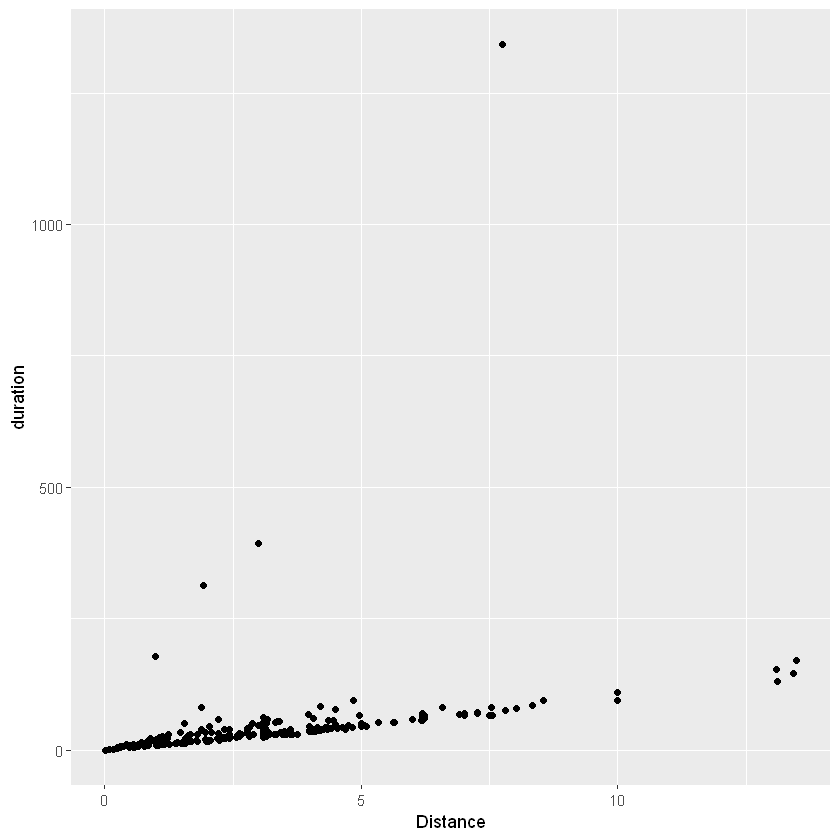

In [96]:
ggplot(data = df, mapping = aes(x = Distance, y = duration)) + 
    geom_point()

In [97]:
df <- df[df$duration < 170,]

In [98]:
df2022 <- df[df$Date.Sub >= "2022-01-01",]
df2021 <- subset(df, Date.Sub < "2022-01-01" & Date.Sub >= "2021-01-01")

In [99]:
df$year <- format(df$Date.Sub, format = "%Y")
df$year <- as.integer(df$year)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 17 rows containing non-finite values (stat_smooth)."
Warning message:
"Computation failed in `stat_smooth()`:
there is no package called 'mgcv'"
Warning message:
"Removed 17 rows containing missing values (geom_point)."


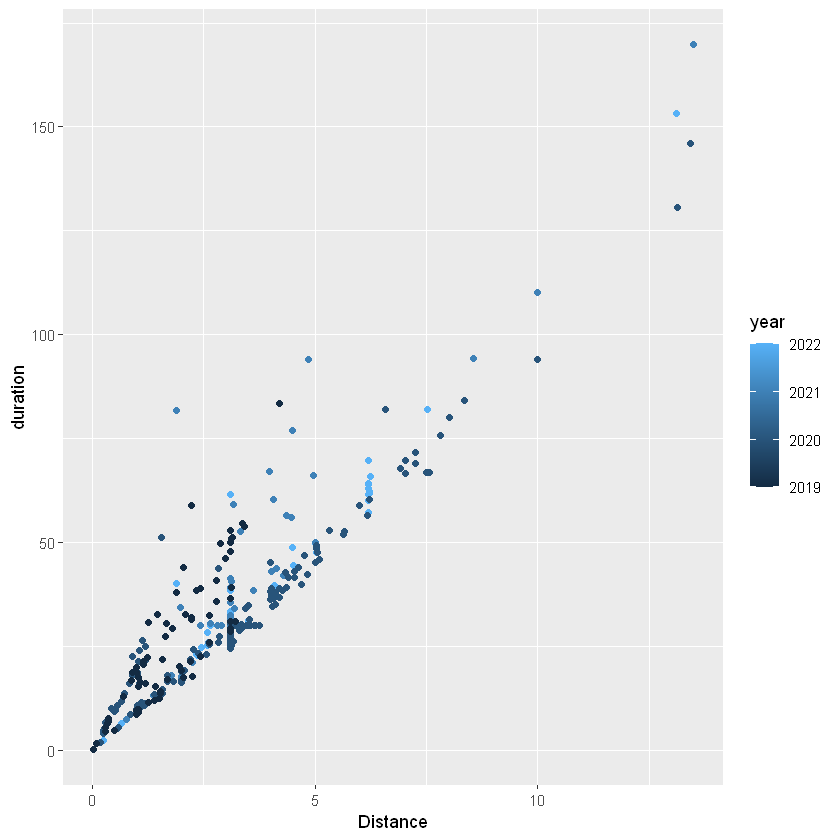

In [100]:
ggplot(data = df, mapping = aes(x = Distance, y = duration, color = year)) + 
    geom_point() + geom_smooth(aes(color = year))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



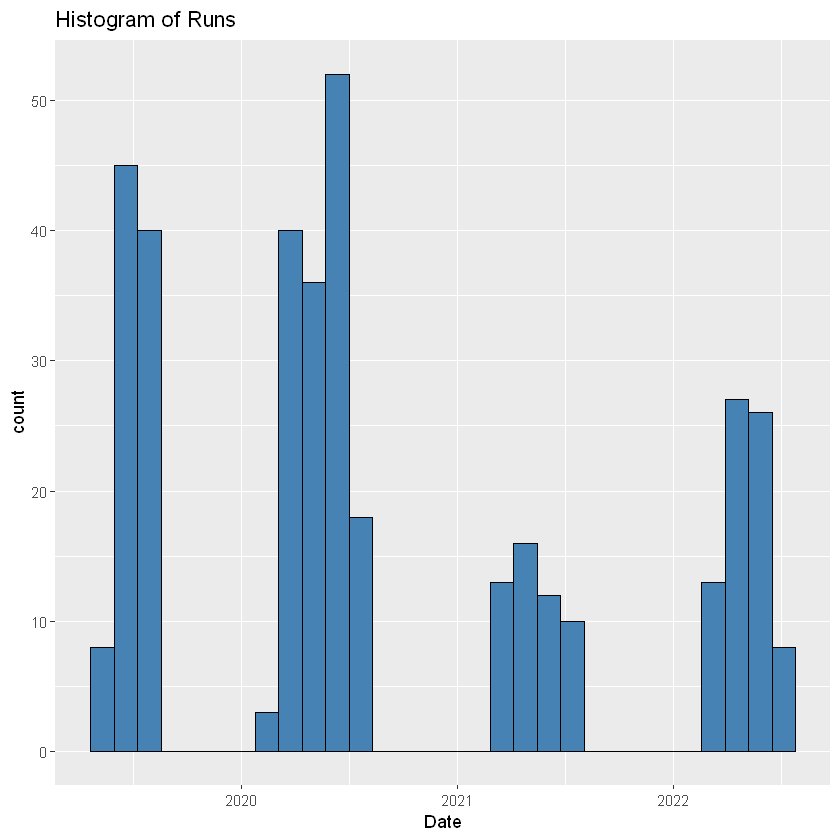

In [101]:
library(ggplot2)
ggplot(data=df, aes(x=Date)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs")

Warning message:
"Removed 17 rows containing missing values (geom_point)."


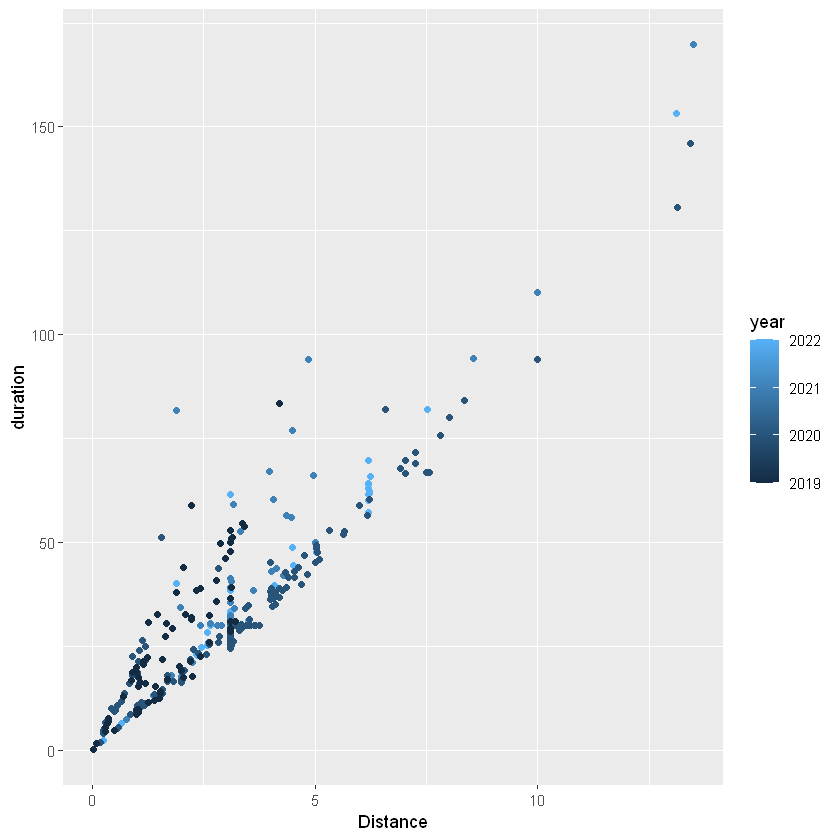

In [102]:
ggplot(data=df, aes(x=Distance, y=duration, color=year)) + 
  geom_point()

Warning message:
"Removed 17 rows containing non-finite values (stat_boxplot)."


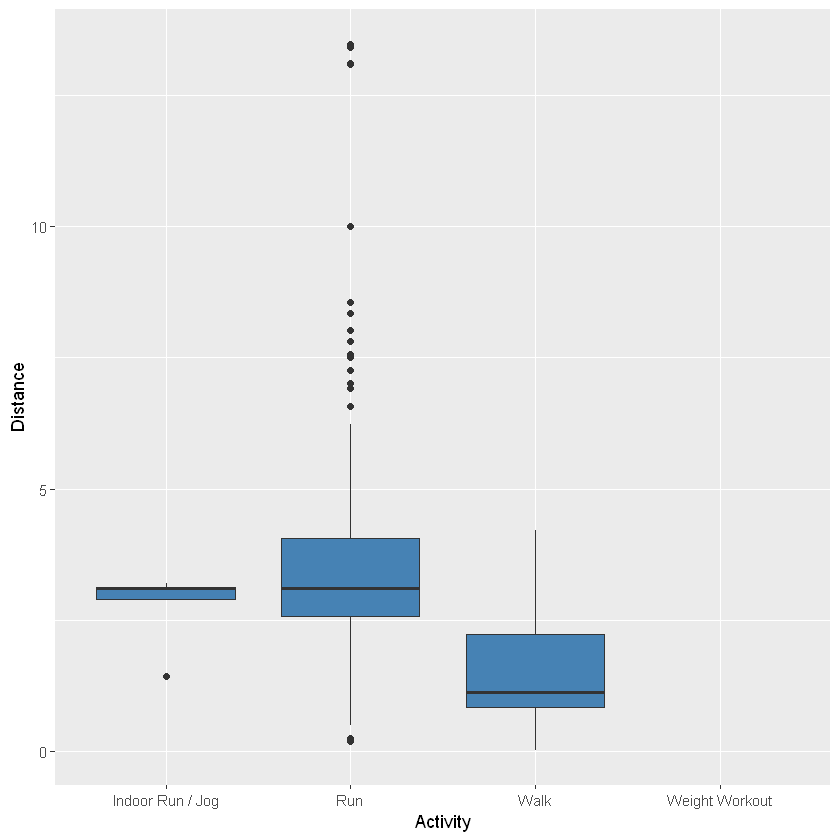

In [103]:
ggplot(data=df, aes(x=Activity, y=Distance)) + 
  geom_boxplot(fill="steelblue")

In [107]:
df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [108]:
head(df, 10)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,year,new_bin
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022,"(3.09,6.21]"
2,2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022,"(3.09,6.21]"
3,2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022,"(3.09,6.21]"
4,2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90,2022,"(3.09,6.21]"
5,2022-06-23,2022-06-23,Run,410,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13,2022,"(3.09,6.21]"
6,2022-06-21,2022-06-22,Run,403,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75,2022,"(3.09,6.21]"
7,2022-06-19,2022-06-19,Run,378,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00,2022,"(0,3.09]"
8,2022-06-18,2022-06-18,Run,370,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022,"(0,3.09]"
9,2022-06-16,2022-06-17,Run,315,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18,2022,"(0,3.09]"


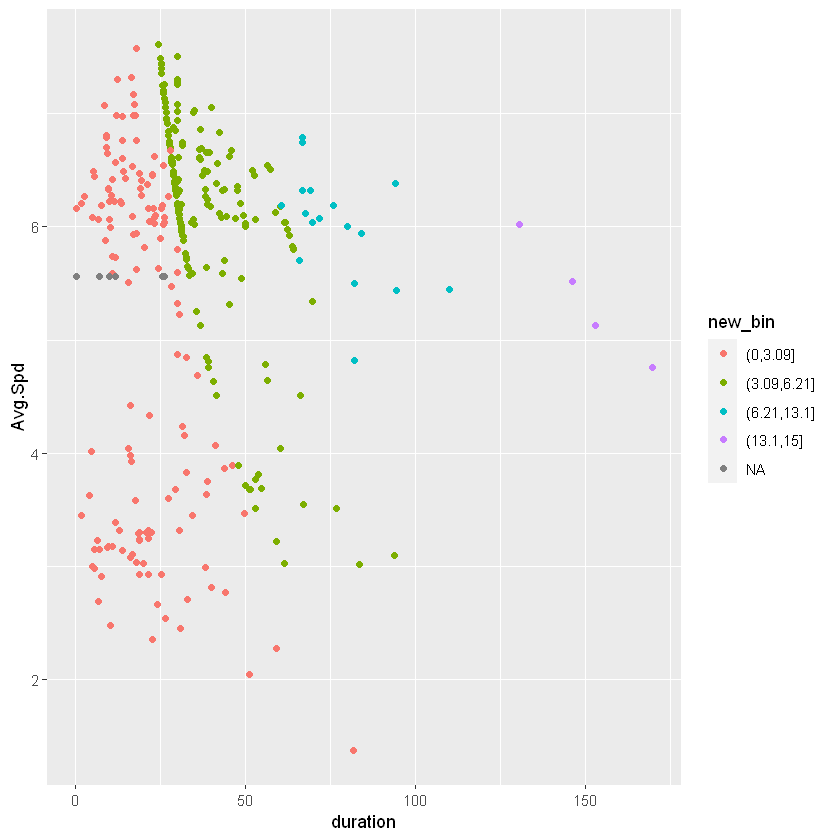

In [113]:
ggplot(data=df, aes(x=duration, y=Avg.Spd, color=new_bin)) + 
  geom_point()

In [53]:
data <- as.matrix(df)
heatmap(data, scale="column")

ERROR: Error in heatmap(data, scale = "column"): 'x' must be a numeric matrix


In [51]:
sapply(df, function(x) sum(is.na(x)))


Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
         0          0          0          0         17          0          0 
  Max.Pace    Avg.Spd    Max.Spd     Avg.HR      Steps   duration       year 
         0          0          0          0          0          0          0

In [932]:
head(df, 10)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,year
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2022-07-10,2022-07-10,Run,429,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
2,2022-07-09,2022-07-09,Run,430,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
3,2022-07-08,2022-07-08,Run,454,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
4,2022-06-24,2022-06-24,Run,400,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90,2022
5,2022-06-23,2022-06-23,Run,410,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13,2022
6,2022-06-21,2022-06-22,Run,403,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75,2022
7,2022-06-19,2022-06-19,Run,378,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00,2022
8,2022-06-18,2022-06-18,Run,370,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
9,2022-06-16,2022-06-17,Run,315,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18,2022


# Amazon Halo Data

In [933]:
hdf <- read.csv('C:/Users/coleb/OneDrive/Cosmo/Datasets/Amazon Health Data/Amazon Health Data 3/Activity/Activity_Workouts_1970-01-01--2022-07-10_394cfb3f-ba6a-4173-8490-e7869c2a627d.csv')

In [934]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-07-10T17:12:25.443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,780000.0,140,125,1724,272,1.0.118889,ios,15.6,1375921,1375921,Not Applicable,User Logged
2,2022-07-10T16:46:30.782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,60000.0,169,150,3587,419,1.0.118889,ios,15.6,1554623,1554623,Not Applicable,User Logged


In [935]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [936]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-10T17:12:25.443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,780000.0,140,125,1724,272,1.0.118889,1375921,1375921
2,2022-07-10T16:46:30.782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,60000.0,169,150,3587,419,1.0.118889,1554623,1554623


In [937]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [938]:
row.names(dtparts) = NULL

In [939]:
install.packages("chron")
library(chron)

Warning message:
"package 'chron' is in use and will not be installed"


In [940]:
dates = dtparts[,1]
times = dtparts[,2]

In [941]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [942]:
names(dates)[names(dates) == "dates"] <- "Date"

In [943]:
cadf <- as.data.frame(cadf)

In [944]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
2022-07-10T17:12:25.443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,780000.0,140,125,1724,272,1.0.118889,1375921,1375921,2022-07-10
2022-07-10T16:46:30.782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,60000.0,169,150,3587,419,1.0.118889,1554623,1554623,2022-07-10
2022-07-09T17:37:00.000Z,2022-07-09T18:49:00.000Z,WORKOUT,OTHER,Automatic,-6,51.95,240000.0,2580000.0,156,106,2485,535,1.0.118889,4320000,4320000,2022-07-10
2022-07-09T16:52:00.000Z,2022-07-09T17:03:00.000Z,WORKOUT,OTHER,Automatic,-6,11.05,180000.0,300000.0,151,124,437,106,1.0.118889,660000,660000,2022-07-10
2022-07-09T16:16:06.301Z,2022-07-09T16:51:58.601Z,WORKOUT,RUNNING,Automatic,-6,68.00336666666666,2038601.0,No Data,177,156,5483,601,1.0.118889,2152300,2152300,2022-07-10
2022-07-08T20:35:43.703Z,2022-07-08T20:55:39.512Z,WORKOUT,WALKING,Automatic,-6,2.763580833333333,No Data,120000.0,123,97,1214,149,1.0.118889,1195809,1195809,2022-07-10
2022-07-08T19:15:02.729Z,2022-07-08T19:55:53.044Z,WORKOUT,WALKING,Automatic,-6,6.547725833333334,No Data,300000.0,123,86,2533,242,1.0.118889,2450315,2450315,2022-07-10
2022-07-08T16:34:41.433Z,2022-07-08T17:07:32.604Z,WORKOUT,RUNNING,Automatic,-6,65.7057,1971171.0,No Data,178,167,5100,622,1.0.118889,1971171,1971171,2022-07-10
2022-06-17T04:54:10.702Z,2022-06-17T05:18:04.344Z,WORKOUT,RUNNING,Automatic,-5,41.16348166666667,1140000.0,184344.0,134,122,3311,289,1.0.114475,1433642,1433642,2022-07-10


In [945]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

In [946]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [947]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-10,17:12:25.443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,780000.0,140,125,1724,272,1.0.118889,1375921,1375921
2,2022-07-10,16:46:30.782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,60000.0,169,150,3587,419,1.0.118889,1554623,1554623


In [948]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [949]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-10,17:12:25.443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,780000.0,140,125,1724,272,1.0.118889,1375921,1375921
2,2022-07-10,16:46:30.782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,60000.0,169,150,3587,419,1.0.118889,1554623,1554623


In [950]:
mymerge <- merge(cadf, df, by = c("Date"))

In [952]:
library(stringr)
library(tidyr)
mymerge <- separate(mymerge, Time, c('Times', 'Ms'), "[.]")

In [ ]:
mymerge$DTS <- with(mymerge, ymd(Date) + hms(Times))

In [ ]:
library("lubridate")
hours <- -3600 * mymerge$Local.Time.Zone.Offset
mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)

In [ ]:
mymerge <- mymerge[order(my_date_time1, decreasing = TRUE),]

In [ ]:
head(mymerge, 2)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dttm>,<dttm>
139,2022-07-10,17:12:25,443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,⋯,12.37,0.99,4.85,60.41,149,5125,38.35,2022,2022-07-10 17:12:25,2022-07-10 23:12:25
138,2022-07-10,16:46:30,782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,⋯,12.37,0.99,4.85,60.41,149,5125,38.35,2022,2022-07-10 16:46:30,2022-07-10 22:46:30


In [957]:
test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [ ]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [ ]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-10,17:12:25.443Z,2022-07-10T17:35:21.364Z,WORKOUT,WALKING,Automatic,-6,22.301899999999996,274557.0,780000.0,140,125,1724,272,1.0.118889,1375921,1375921
2,2022-07-10,16:46:30.782Z,2022-07-10T17:12:25.405Z,WORKOUT,RUNNING,Automatic,-6,47.92118166666667,1405405.0,60000.0,169,150,3587,419,1.0.118889,1554623,1554623


In [ ]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [ ]:
head(test, 2)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"July 10, 2022","July 10, 2022",Run,429,3.09815,2301,12.3732,0.993196,4.84920,60.4110,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939
2,"July 9, 2022","July 9, 2022",Run,430,3.10009,2005,10.7738,1.166080,5.56904,51.4543,157,5261,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6701305771


In [968]:
names(test)[names(test) == "Workout.Date"] <- "Date"


In [969]:
head(df, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,year
,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2022-07-10,2022-07-10,Run,429,3.1,2301,12.37,0.99,4.85,60.41,149,5125,38.35,2022
2,2022-07-09,2022-07-09,Run,430,3.1,2005,10.77,1.17,5.57,51.45,157,5261,33.42,2022


In [970]:
test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

ERROR: Error in `$<-.data.frame`(`*tmp*`, Workout.Date, value = structure(numeric(0), class = "Date")): replacement has 0 rows, data has 696


In [971]:
head(test, 2)

,Date.Submitted,Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"July 10, 2022",2022-07-10,Run,429,3.09815,2301,12.3732,0.993196,4.84920,60.4110,149,5125,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6703432939
2,"July 9, 2022",2022-07-09,Run,430,3.10009,2005,10.7738,1.166080,5.56904,51.4543,157,5261,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6701305771


In [981]:
mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [982]:
head(mmerge2, 2)
mmerge2 <- as.data.frame(mmerge2)

,Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
,<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2019-05-13,"May 13, 2019",Run,258,1.96155,1214,10.3169,2.67299,5.81568,22.4468,⋯,1.96,1214,10.32,2.67,5.82,22.45,140.5377,3209,20.23,2019
2,2019-05-13,"May 13, 2019",Run,258,1.96155,1214,10.3169,2.67299,5.81568,22.4468,⋯,1.42,927,10.88,17.09,5.51,3.51,158.0000,67,15.45,2019


In [983]:
mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [984]:
mmerge2

,Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
,<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
676,2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
675,2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
674,2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
673,2022-06-24,"June 24, 2022",Run,400,3.10000,1554,8.35484,0.000000,7.18147,0.0000,⋯,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90,2022
672,2022-06-23,"June 23, 2022",Run,410,3.10000,1748,9.39785,0.000000,6.38444,0.0000,⋯,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13,2022
671,2022-06-22,"June 21, 2022",Run,403,3.10000,1665,8.95161,0.000000,6.70270,0.0000,⋯,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75,2022
670,2022-06-19,"June 19, 2022",Run,378,2.66000,1800,11.27820,0.000000,5.32000,0.0000,⋯,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00,2022
669,2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
668,2022-06-17,"June 16, 2022",Run,315,2.33000,1391,9.94993,0.000000,6.03019,0.0000,⋯,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18,2022


In [990]:
library(tidyr)
testdf2 <- mmerge2 %>% drop_na()

In [991]:
testdf2

Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
2022-06-12,"June 12, 2022",Run,428,3.09762,1955,10.51630,3.008140,5.70545,19.9459,⋯,3.10,1955,10.52,3.010,5.71,19.95000,140.5377,5052,32.58,2022
2022-06-10,"June 10, 2022",Run,881,6.20257,4182,11.23370,0.599692,5.34108,100.0510,⋯,6.20,4182,11.23,0.600,5.34,100.05000,153.0000,10479,69.70,2022
2022-06-08,"June 9, 2022",Run,407,3.11000,1702,9.12111,0.000000,6.57814,0.0000,⋯,3.11,1702,9.12,4.026,6.58,52.59158,153.0000,4548,28.37,2022
2022-06-06,"June 6, 2022",Run,590,4.50165,2924,10.82230,1.146470,5.54409,52.3344,⋯,4.50,2924,10.82,1.150,5.54,52.33000,145.0000,7739,48.73,2022
2022-06-05,"June 5, 2022",Walk,253,1.88061,2402,21.27700,1.791470,2.81995,33.4920,⋯,1.88,2402,21.28,1.790,2.82,33.49000,109.0000,3994,40.03,2022


In [ ]:
library(tidyr)
test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [ ]:
library("lubridate")
hours <- -3600 * mymerge$Local.Time.Zone.Offset
mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)